### Zip Code

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

In [2]:
zillow_11 = pd.read_csv('./Resources/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_11.head


<bound method NDFrame.head of        RegionID  SizeRank  RegionName RegionType StateName State        City  \
0         61639         0       10025        Zip        NY    NY    New York   
1         84654         1       60657        Zip        IL    IL     Chicago   
2         61637         2       10023        Zip        NY    NY    New York   
3         91982         3       77494        Zip        TX    TX        Katy   
4         84616         4       60614        Zip        IL    IL     Chicago   
...         ...       ...         ...        ...       ...   ...         ...   
26767     75095     34430       38959        Zip        MS    MS   Inverness   
26768     58866     34430        2714        Zip        MA    MA   Dartmouth   
26769     95186     34430       86343        Zip        AZ    AZ  Crown King   
26770     66881     34430       21405        Zip        MD    MD   Annapolis   
26771     69440     34430       27599        Zip        NC    NC      Durham   

         

In [3]:
df_4bdr=pd.melt(zillow_11,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City','Metro', 'CountyName']) 
df_4bdr.head

<bound method NDFrame.head of          RegionID  SizeRank  RegionName RegionType StateName State  \
0           61639         0       10025        Zip        NY    NY   
1           84654         1       60657        Zip        IL    IL   
2           61637         2       10023        Zip        NY    NY   
3           91982         3       77494        Zip        TX    TX   
4           84616         4       60614        Zip        IL    IL   
...           ...       ...         ...        ...       ...   ...   
7870963     75095     34430       38959        Zip        MS    MS   
7870964     58866     34430        2714        Zip        MA    MA   
7870965     95186     34430       86343        Zip        AZ    AZ   
7870966     66881     34430       21405        Zip        MD    MD   
7870967     69440     34430       27599        Zip        NC    NC   

               City                             Metro           CountyName  \
0          New York       New York-Newark-Jersey Ci

In [4]:
df_4bdr["type"]="4-bdr"
df_4bdr["variable"]=df_4bdr["variable"].astype('datetime64[m]')
df_4bdr["epoch"] = (df_4bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()
df_4bdr=df_1bdr.dropna(how="any")
df_4bdr

NameError: name 'df_1bdr' is not defined

In [5]:
df_4bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,NaN,4-bdr,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,398286.0,4-bdr,8.230464e+08
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,NaN,4-bdr,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,190908.0,4-bdr,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,515152.0,4-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870963,75095,34430,38959,Zip,MS,MS,Inverness,Indianola,Sunflower County,2020-06-30,40539.0,4-bdr,1.593475e+09
7870964,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2020-06-30,946942.0,4-bdr,1.593475e+09
7870965,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,249801.0,4-bdr,1.593475e+09
7870966,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,910535.0,4-bdr,1.593475e+09


In [6]:
X11=df_4bdr["variable"].values.reshape(-1,1)
y11=df_4bdr["value"].values.reshape(-1,1)

X22=df_4bdr["epoch"].values.reshape(-1,1)
y22=df_4bdr["value"].values.reshape(-1,1)

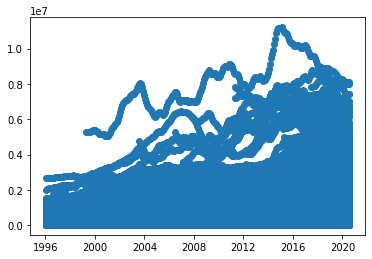

In [7]:
plt.scatter(X11,y11)

In [8]:
# Prediction 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X22, y22, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model
X_test

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

In [ ]:
model.predict(np.array([1596662122]).reshape(-1, 1))

## schools_data

In [11]:
schools_data= pd.read_csv('./Resources/number-of-schools.csv')
schools_data.head(10)

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
5,5,2007,LINCOLN,NE,68516,LANCASTER
6,6,2008,LAS VEGAS,NV,89121,CLARK
7,7,2009,LAS VEGAS,NV,89141,CLARK
8,8,2010,ATLANTIC CITY,NJ,8401,ATLANTIC
9,9,2011,WESTFIELD,NJ,7090,UNION


In [12]:
nc_schols=schools_data[schools_data['state']=='NC']


In [13]:
nc_schols_df=nc_schols.groupby("zip")["objectid"].count().reset_index(name="count")
nc_schols_df


,zip,count
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [14]:
nc_df_4bdr=df_4bdr[df_4bdr['State']=='NC']
nc_df_4bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
31,69816,33,28269,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,166563.0,4-bdr,823046400.0
54,69823,56,28277,Zip,NC,NC,Charlotte,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,232575.0,4-bdr,823046400.0
84,69672,86,28027,Zip,NC,NC,Concord,Charlotte-Concord-Gastonia,Cabarrus County,1996-01-31,178746.0,4-bdr,823046400.0
138,69431,140,27587,Zip,NC,NC,Wake Forest,Raleigh,Wake County,1996-01-31,265843.0,4-bdr,823046400.0
183,69699,186,28078,Zip,NC,NC,Huntersville,Charlotte-Concord-Gastonia,Mecklenburg County,1996-01-31,204852.0,4-bdr,823046400.0
188,69450,191,27610,Zip,NC,NC,Raleigh,Raleigh,Wake County,1996-01-31,132335.0,4-bdr,823046400.0
191,69340,194,27410,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,177292.0,4-bdr,823046400.0
197,69336,200,27406,Zip,NC,NC,Greensboro,Greensboro-High Point,Guilford County,1996-01-31,130326.0,4-bdr,823046400.0
212,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,1996-01-31,127457.0,4-bdr,823046400.0
239,69533,242,27834,Zip,NC,NC,Greenville,Greenville,Pitt County,1996-01-31,NaN,4-bdr,823046400.0


In [15]:


nc_df_4bdr=nc_df_4bdr.groupby(["City","RegionName"])["value"].mean().reset_index(name="avg")
nc_df_4bdr

,City,RegionName,avg
0,Aberdeen,28315,216032.025510
1,Advance,27006,322164.619565
2,Ahoskie,27910,133681.966851
3,Albemarle,28001,161291.037415
4,Albertson,28508,135165.292517
...,...,...,...
731,Yanceyville,27379,112018.551440
732,Youngsville,27596,237543.925170
733,Zebulon,27597,207699.343537
734,Zionville,28698,230760.395522


In [16]:
merge_data=pd.merge(nc_df_4bdr,nc_schols_df,left_on="RegionName",right_on="zip")


In [17]:
merge_data



,City,RegionName,avg,zip,count
0,Aberdeen,28315,216032.025510,28315,4
1,Advance,27006,322164.619565,27006,2
2,Ahoskie,27910,133681.966851,27910,4
3,Albemarle,28001,161291.037415,28001,8
4,Albertson,28508,135165.292517,28508,1
...,...,...,...,...,...
580,Yadkinville,27055,169151.543011,27055,4
581,Yanceyville,27379,112018.551440,27379,3
582,Youngsville,27596,237543.925170,27596,3
583,Zebulon,27597,207699.343537,27597,5


In [18]:
merge_data[""] = merge_data["City"].astype('category').cat.codes

In [19]:
merge_data

,City,RegionName,avg,zip,count,
0,Aberdeen,28315,216032.025510,28315,4,0
1,Advance,27006,322164.619565,27006,2,1
2,Ahoskie,27910,133681.966851,27910,4,2
3,Albemarle,28001,161291.037415,28001,8,3
4,Albertson,28508,135165.292517,28508,1,4
...,...,...,...,...,...,...
580,Yadkinville,27055,169151.543011,27055,4,460
581,Yanceyville,27379,112018.551440,27379,3,461
582,Youngsville,27596,237543.925170,27596,3,462
583,Zebulon,27597,207699.343537,27597,5,463


In [27]:
# city_categorized = pd.categorical(merge_data["City"])
# city_categorized

In [28]:
# without_location = merge_data[["avg", "count"]]
# without_location

In [29]:
X=merge_data["City"].values.reshape(-1,1)
y=merge_data["avg"].values.reshape(-1,1)


In [30]:
# X=merge_data["RegionName"].values.reshape(-1,1)
# y=merge_data["avg"].values.reshape(-1,1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [32]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [33]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008052118526324592
Testing Score: 0.0022981930200947076


Mean Squared Error (MSE): 18648088446.431126
R-squared (R2 ): 0.0022981930200947076


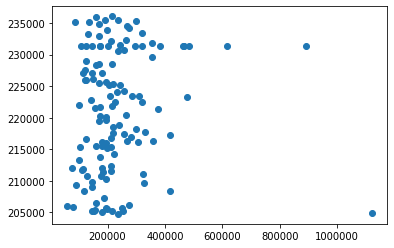

In [34]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION
plt.scatter(y_test,predicted)

Text(0.5, 1.0, 'Residual Plot')

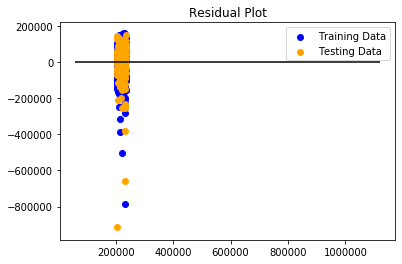

In [35]:

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


## income_data

In [36]:
income_data = pd.read_csv('./Resources/rw_census_data.csv')
income_data.head(10)

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
5,60303.0,28547.0,18171.0,612,47.339270
6,10765.0,5388.0,16018.0,616,50.051092
7,23974.0,11879.0,16735.0,617,49.549512
8,6578.0,3309.0,15206.0,622,50.304044
9,42427.0,22617.0,16280.0,623,53.308035


In [37]:
merge_data2=pd.merge(merge_data,income_data,left_on="RegionName",right_on="zipcode")

merge_data2

,City,RegionName,avg,zip,count,population,poverty_count,median_household_income,zipcode,poverty_rate
0,0,28315,2.160320e+05,28315,4,13700.0,2826.0,51725.0,28315,20.627737
1,1,27006,3.221646e+05,27006,2,14555.0,932.0,78095.0,27006,6.403298
2,2,28001,1.612910e+05,28001,8,26601.0,5208.0,45121.0,28001,19.578211
3,3,27501,2.092624e+05,27501,5,21299.0,2601.0,56338.0,27501,12.211841
4,4,27502,2.822962e+05,27502,7,40280.0,2248.0,110513.0,27502,5.580933
...,...,...,...,...,...,...,...,...,...,...
497,378,28480,1.119684e+06,28480,1,2536.0,216.0,83417.0,28480,8.517350
498,379,27055,1.691515e+05,27055,4,14131.0,1855.0,44574.0,27055,13.127167
499,380,27596,2.375439e+05,27596,3,18359.0,1624.0,70535.0,27596,8.845798
500,381,27597,2.076993e+05,27597,5,23538.0,2995.0,58514.0,27597,12.724106


In [48]:
X=merge_data2[["City","population","median_household_income", "count", "poverty_rate"]]
y=merge_data2["avg"].values.reshape(-1,1)


In [39]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [40]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [41]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3658458427724829
Testing Score: -760810.4719045529


In [42]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 1.3535958100020586e+16
R-squared (R2 ): -760810.4719045529


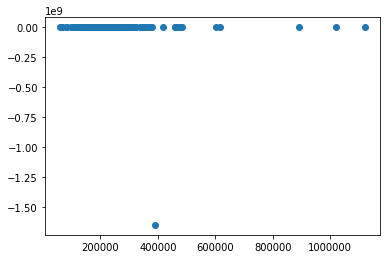

In [43]:
plt.scatter(y_test,predicted)

In [44]:
y_test

array([[ 302547.97959184],
       [ 615270.70068027],
       [ 219440.5503876 ],
       [ 166848.78571429],
       [ 238188.19565217],
       [ 157024.82065217],
       [ 113902.64111498],
       [ 125190.04864865],
       [ 245033.9047619 ],
       [ 199030.75170068],
       [ 192996.2122905 ],
       [ 318731.84013605],
       [ 255741.91756272],
       [ 173103.0170068 ],
       [ 164243.97619048],
       [ 138398.94217687],
       [1119684.3015873 ],
       [ 275177.65201465],
       [ 123978.23809524],
       [ 136478.13513514],
       [ 255619.36734694],
       [ 152822.86734694],
       [ 221384.57823129],
       [ 476891.42307692],
       [ 109350.29591837],
       [ 159333.42857143],
       [  78863.52747253],
       [  66697.75510204],
       [ 257147.05102041],
       [ 199166.40136054],
       [ 223146.45578231],
       [ 110732.71768707],
       [ 245471.34013605],
       [ 169453.58974359],
       [ 161291.03741497],
       [ 105867.63636364],
       [ 210043.99462366],
 

In [45]:
predicted

array([[ 2.92978438e+05],
       [ 3.01150594e+05],
       [ 1.86255708e+05],
       [ 1.88903855e+05],
       [ 2.04655597e+05],
       [ 2.04330124e+05],
       [ 2.00744266e+05],
       [ 1.69200247e+05],
       [ 2.51591991e+05],
       [ 2.09020038e+05],
       [ 2.26757585e+05],
       [ 2.86773230e+05],
       [ 2.69188009e+05],
       [ 2.50990222e+05],
       [ 1.70814804e+05],
       [ 1.36878883e+05],
       [ 2.95734812e+05],
       [ 2.67747236e+05],
       [ 1.69476076e+05],
       [ 1.72202339e+05],
       [ 1.90468940e+05],
       [ 1.73102843e+05],
       [ 2.64162719e+05],
       [ 1.95694899e+05],
       [ 1.42723520e+05],
       [ 1.66832434e+05],
       [ 1.72671827e+05],
       [ 1.54547390e+05],
       [ 3.13202867e+05],
       [ 1.89387845e+05],
       [ 2.28480827e+05],
       [ 1.25449013e+05],
       [ 2.24643014e+05],
       [ 2.00123262e+05],
       [ 1.97036657e+05],
       [ 1.39959173e+05],
       [ 2.03377907e+05],
       [ 2.98421135e+05],
       [ 1.5

In [46]:
merge_data2.to_csv('merged_data.csv', index=False, header=True)

Text(0.5, 1.0, 'Residual Plot')

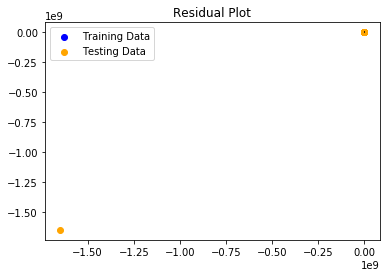

In [47]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")